In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
capmerge = pd.read_csv('../data/capmerge.csv')
georegions = pd.read_csv('../data/georegions.csv')
ratesbymetro = pd.read_csv('../data/ratesbymetro.csv')

In [5]:
capmerge['install_ratio'] = round((capmerge.existing_installs_count / capmerge.count_qualified) * 100,2)
ratesbymetro['avg_rate'] = ratesbymetro['Thousand Dollars'] / ratesbymetro['Megawatthours']
ratesbymetro['usage'] = ratesbymetro['Megawatthours'] / ratesbymetro['Count']
dataset = capmerge.merge(georegions.merge(ratesbymetro, how='inner', on='GEOID10'), how='inner', on='region_name')
dataset['savings_10kw_house'] = (((10 * dataset['yearly_sunlight_kwh_kw_threshold_avg']) * dataset['avg_rate']) / .85) - (dataset['usage'] * dataset['avg_rate'])

In [9]:
#dataset.corr().to_csv('../data/corr.csv')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45122 entries, 0 to 45121
Data columns (total 96 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   region_name                                                  45122 non-null  int64  
 1   state_name_x                                                 45122 non-null  object 
 2   lat_max                                                      45122 non-null  float64
 3   lat_min                                                      45122 non-null  float64
 4   lng_max                                                      45122 non-null  float64
 5   lng_min                                                      45122 non-null  float64
 6   lat_avg                                                      45122 non-null  float64
 7   lng_avg                                                      45122 non-null 

In [53]:
datacorr = dataset.iloc[:,[*range(8,31)]+[*range(34,74)]+[89,90,91,93,94,95]].corr()

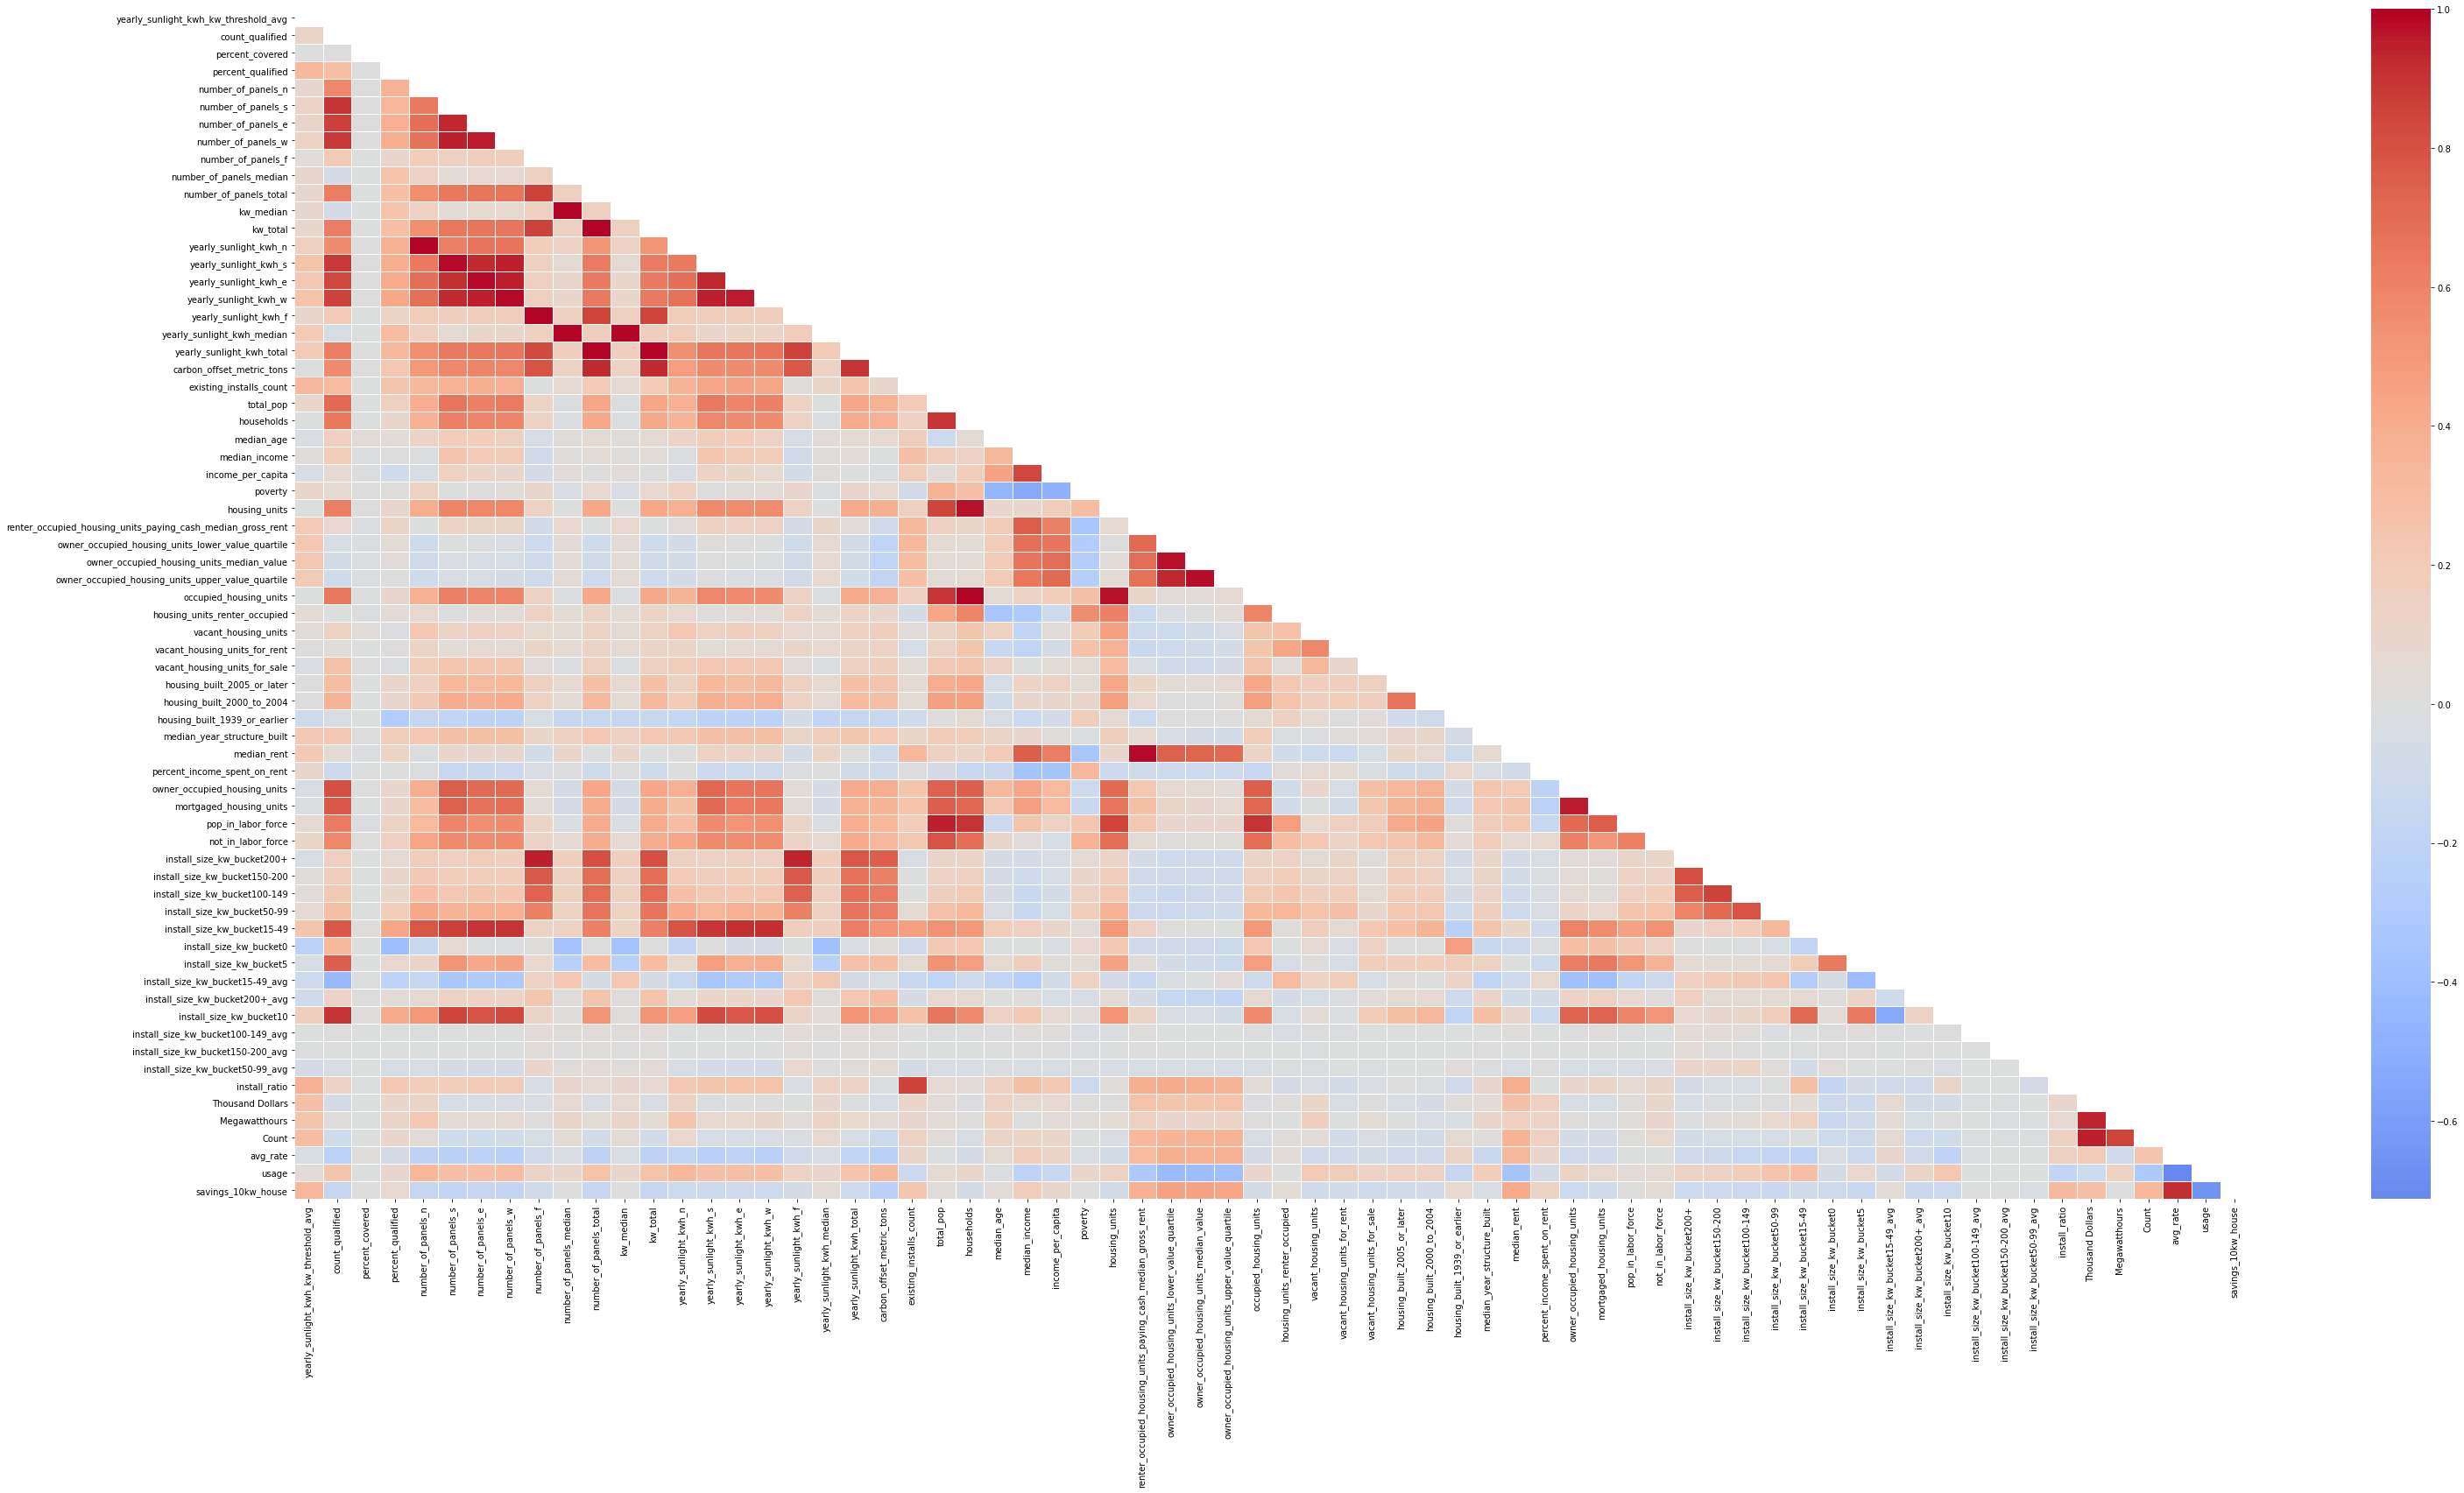

In [60]:
f, ax = plt.subplots(figsize=(50, 25))

mask = np.triu(np.ones_like(datacorr, dtype=bool))
cmap = sns.color_palette("coolwarm", as_cmap=True)
ax = sns.heatmap(datacorr, cmap=cmap,mask=mask, linewidths=.5, center=0)
f.savefig('../maps/corr.png')